In [1]:
from Algos_sims import pipeline_mf, infer_mf, PMF
from Plots import plot_line_with_CI
from Syn_data_gen import generate_synthetic_ratings, inject_random_attacker_favoritizing, generate_random_basic_data
from Syn_data_gen import inject_nans
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from IPython.display import clear_output
import multiprocessing as mp

In [9]:
ratings_df, long_df, meta = generate_synthetic_ratings(
    n_users=10,
    n_items=10,
    n_factors=6,
    n_groups=5,
    group_strength=0.1,
    user_noise=0.1,
    item_scale=0.1,
    item_bias_std=0.0,
    user_bias_std=0.0,
    global_mean=0.0,
    noise_std=0.05,
    rating_min=None,
    rating_max=None,
    #random_seed=2025
)

print("Generated matrix shape:", ratings_df.shape)

ratings_df

Generated matrix shape: (10, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.081804,0.020172,-0.033712,0.012240,-0.236504,-0.210075,0.162533,-0.238098,0.147308,-0.274142
1,-0.032151,-0.040849,0.397821,0.008592,-0.186915,-0.109222,-0.364424,0.056658,-0.044545,0.108144
2,-0.171750,-0.052650,-0.083361,0.118271,-0.008907,0.062336,-0.126505,0.086805,0.007753,0.060534
3,-0.165994,0.010761,-0.076413,0.159872,-0.009717,0.078219,-0.129210,0.211499,0.036350,0.035596
4,-0.021200,0.252927,0.015018,-0.167175,0.074898,0.047729,0.185932,-0.089973,-0.206018,0.024312
5,0.019802,0.310897,-0.087568,-0.162182,0.038441,0.120663,0.204908,-0.240871,-0.134266,0.080016
6,0.025481,-0.078090,0.165165,0.068370,-0.121539,-0.159218,-0.394890,0.056213,-0.053163,0.020356
7,-0.094775,0.316117,-0.128996,0.043576,0.128390,0.097661,0.131374,-0.035392,0.008144,0.132764
8,0.003000,0.236266,-0.136050,-0.128773,0.143971,-0.049500,0.154337,-0.050782,0.058890,0.195458
9,0.125061,0.026910,-0.046337,-0.009504,-0.116319,-0.179080,0.226311,-0.233523,0.079808,-0.240827


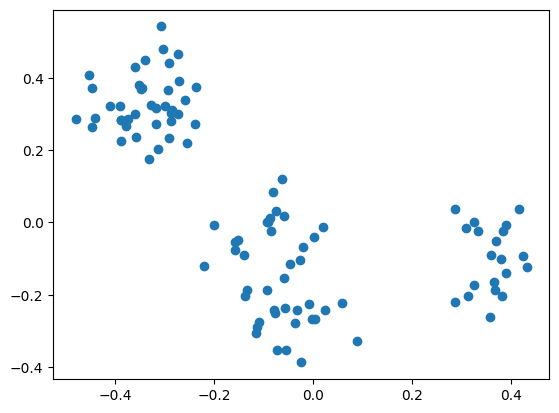

In [67]:
plt.scatter(ratings_df['item_0'], ratings_df['item_1'])

In [30]:
import numpy as np
rand_gen =  np.random.default_rng()

user_bias = rand_gen.normal(loc=0.0, scale=5.0, size=100)
item_bias = rand_gen.normal(loc=0.0, scale=0.1, size=2)

# Compute raw ratings matrix
print(user_bias[:, None] + item_bias[None, :])

[[ -5.16274708  -5.16624155]
 [  7.25935083   7.25585636]
 [ -1.05521966  -1.05871412]
 [  2.95629409   2.95279962]
 [  5.74415853   5.74066407]
 [  5.7654253    5.76193084]
 [ -0.44364573  -0.4471402 ]
 [ -1.30866671  -1.31216117]
 [ -3.59024295  -3.59373742]
 [ -3.81334092  -3.81683539]
 [ -6.37020575  -6.37370022]
 [  2.94453789   2.94104342]
 [ -1.77111857  -1.77461303]
 [  4.11649282   4.11299835]
 [  0.17778242   0.17428795]
 [  5.38574488   5.38225041]
 [  0.70522366   0.70172919]
 [ -0.27811533  -0.28160979]
 [  8.11638724   8.11289277]
 [ -2.02662586  -2.03012033]
 [ -1.91832572  -1.92182019]
 [  2.12157972   2.11808526]
 [ -6.51951951  -6.52301398]
 [ -2.66426222  -2.66775669]
 [ -4.80739051  -4.81088498]
 [  4.02742292   4.02392845]
 [ -1.8955329   -1.89902737]
 [  4.03038338   4.02688892]
 [  3.17537935   3.17188489]
 [  2.47632977   2.47283531]
 [  2.67699646   2.673502  ]
 [ 11.75620461  11.75271015]
 [  1.27075686   1.2672624 ]
 [ -3.29697005  -3.30046451]
 [  0.55558088

In [10]:
ratings_att = inject_random_attacker_favoritizing(df=ratings_df, random_seed=5, nb_attackers=100, att_grade=100)

In [11]:
ratings_att

,0,1,2,3,4,5,6,7,8,9
0,0.081804,0.020172,-0.033712,0.012240,-0.236504,-0.210075,0.162533,-0.238098,0.147308,NaN
1,-0.032151,-0.040849,0.397821,0.008592,-0.186915,-0.109222,-0.364424,0.056658,-0.044545,0.108144
2,-0.171750,-0.052650,-0.083361,0.118271,-0.008907,0.062336,-0.126505,0.086805,0.007753,0.060534
3,-0.165994,0.010761,-0.076413,0.159872,-0.009717,0.078219,-0.129210,0.211499,0.036350,0.035596
4,-0.021200,0.252927,0.015018,-0.167175,0.074898,0.047729,0.185932,-0.089973,-0.206018,0.024312
...,...,...,...,...,...,...,...,...,...,...
attacker_96,-0.790922,0.150363,0.958825,1.034328,0.226431,1.434136,1.310883,-1.674993,0.385317,100.000000
attacker_97,-0.269806,-0.607273,0.075078,0.418740,0.308654,1.399887,1.028114,-0.553259,-0.722480,100.000000
attacker_98,-0.659952,0.203786,0.513673,1.067847,0.554871,1.483631,-0.419912,0.710041,-0.617918,100.000000
attacker_99,0.164430,-0.887910,-2.563278,0.997093,0.404229,0.182241,-0.659145,-0.291460,0.496917,100.000000


In [2]:
def test_MF(epoch, results_abs, results_square, q, arg_to_test='nb_comp'):


    complete_ratings, long_df, meta = generate_synthetic_ratings(
            n_users=1000,
            n_items=1000,
            n_factors=5,
            n_groups=6,
            group_strength=0.1,
            user_noise=0.1,
            item_scale=0.1,
            user_bias_std=0.0,
            item_bias_std=0.0,
            global_mean=0.0,
            noise_std=0.05,
            rating_min=None,
            rating_max=None,
            random_seed=None
        )

    ratings_df = inject_nans(complete_ratings, 0.8, None)

    #local_result = []

    #print(f'epoch {epoch}: begin loop')
    for id_val, val in enumerate(tqdm(val_to_test, position=epoch, desc=f"Process {epoch}")):
        if arg_to_test == 'nb_comp':
            mf_result = infer_mf(ratings_df, n_components=val)
        elif arg_to_test == 'reg':
            mf_result = infer_mf(ratings_df, n_components=5, reg_param=val)
        elif arg_to_test == 'lr':
            mf_result = infer_mf(ratings_df, n_components=5, learning_rate=val)
        elif arg_to_test == 'nb_epochs':
            mf_result = infer_mf(ratings_df, n_components=5, num_epochs=val)
        else:
            raise NameError(f'Wooooow!!! What\'s {arg_to_test}!?!?!')

        #print(f'epoch {epoch}: finished value {id_val}')

        results_abs[epoch, id_val] = np.mean(np.abs(mf_result - complete_ratings))
        results_square[epoch, id_val] = np.mean(np.power(mf_result - complete_ratings, 2))

        q.put(epoch)

    q.put(None)


In [3]:
manager = mp.Manager()

results_abs = manager.dict()
results_square = manager.dict()

jobs = []

arg_to_test = 'lr'
nb_epochs = 8
val_to_test = [0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.021]

if __name__ == "__main__":

    q = mp.Queue()


    for i in range(nb_epochs):

        p = mp.Process(target=test_MF, args=(i, results_abs, results_square, q, arg_to_test))
        jobs.append(p)
        #print(f'job {i} started')
        p.start()

    # create progress bars in main process
    bars = [
        tqdm(total=len(val_to_test), position=i, desc=f"Process {i}")
        for i in range(nb_epochs)
    ]

    finished = 0
    while finished < nb_epochs:
        msg = q.get()
        if msg is None:
            finished += 1
        else:
            bars[msg].update(1)



    for proc in jobs:
        proc.join()

Process 0:   0%|          | 0/11 [00:00<?, ?it/s]

Process 1:   0%|          | 0/11 [00:00<?, ?it/s]

Process 2:   0%|          | 0/11 [00:00<?, ?it/s]

Process 3:   0%|          | 0/11 [00:00<?, ?it/s]

Process 4:   0%|          | 0/11 [00:00<?, ?it/s]

Process 5:   0%|          | 0/11 [00:00<?, ?it/s]

Process 6:   0%|          | 0/11 [00:00<?, ?it/s]

Process 7:   0%|          | 0/11 [00:00<?, ?it/s]

In [4]:
np_results_abs = np.empty((nb_epochs, len(val_to_test)))
np_results_square = np.empty((nb_epochs, len(val_to_test)))

for i in range(nb_epochs):
    for j in range(len(val_to_test)):
        np_results_abs[i, j] = results_abs[i, j]
        np_results_square[i, j] = results_square[i, j]

means_abs = np.mean(np_results_abs, axis=0)
stds_abs = np.std(np_results_abs, axis=0)

means_square = np.mean(np_results_square, axis=0)
stds_square = np.std(np_results_square, axis=0)

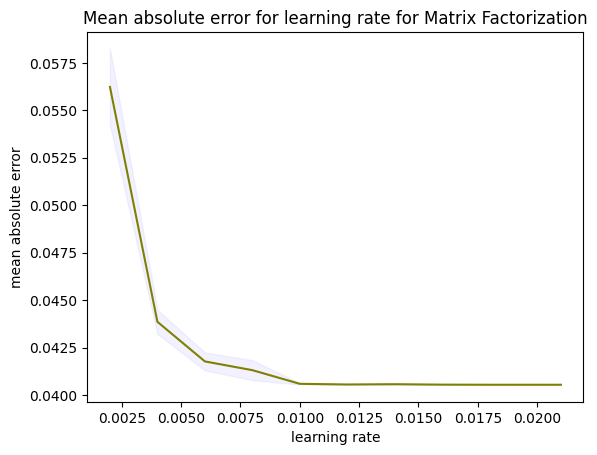

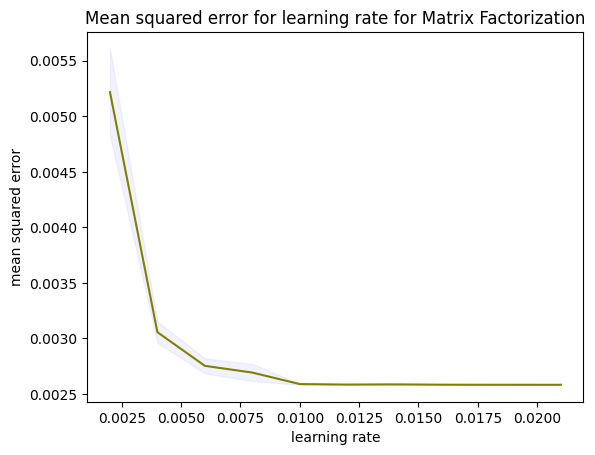

In [5]:
fig, ax = plt.subplots()

ax.set_title('Mean absolute error for learning rate for Matrix Factorization')
ax.set_xlabel('learning rate')
ax.set_ylabel('mean absolute error')
plot_line_with_CI(ax, val_to_test, means_abs, stds_abs, 0.95, nb_epochs, (0.5, 0.5, 0), 'Matrix Factorization')

fig, ax = plt.subplots()

ax.set_title('Mean squared error for learning rate for Matrix Factorization')
ax.set_xlabel('learning rate')
ax.set_ylabel('mean squared error')
plot_line_with_CI(ax, val_to_test, means_square, stds_square, 0.95, nb_epochs, (0.5, 0.5, 0), 'Matrix Factorization')

In [4]:
complete_ratings, long_df, meta = generate_synthetic_ratings(
            n_users=10,
            n_items=10,
            n_factors=5,
            n_groups=3,
            group_strength=0.1,
            user_noise=0.1,
            item_scale=0.1,
            user_bias_std=0.0,
            item_bias_std=0.0,
            global_mean=0.0,
            noise_std=0.05,
            rating_min=None,
            rating_max=None,
            random_seed=None
        )

ratings_df = inject_nans(complete_ratings, 0.5, None)

ratings_df = inject_random_attacker_favoritizing(ratings_df, None, 1, 800)

pmf = PMF(np.array(ratings_df), num_factors=5, learning_rate=0.001,
              reg_param=1, num_epochs=500, print_mse=True)
pmf.train()

------------------------
error: [[3.82277437e-01 2.16274852e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.55323918e-01 1.38992894e-01 0.00000000e+00
  6.75250573e-01 1.17024763e-01]
 [8.09694588e-02 5.68172920e-02 0.00000000e+00 3.27882823e-01
  0.00000000e+00 1.28854696e-01 5.90527720e-02 0.00000000e+00
  0.00000000e+00 1.96141662e-01]
 [5.28380187e-01 0.00000000e+00 1.65251074e-01 2.16179240e-01
  0.00000000e+00 4.41403872e-01 1.39868871e-01 2.10712202e-01
  0.00000000e+00 0.00000000e+00]
 [3.13759417e-01 2.93715179e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.49716097e-01 3.19405135e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.50409643e-01 1.91510596e-01
  0.00000000e+00 4.66989954e-01 9.04767681e-02 0.00000000e+00
  2.54568337e-01 3.74527062e-01]
 [0.00000000e+00 0.00000000e+00 2.96118738e-02 2.76711125e-01
  1.62859692e-02 8.52080766e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.50489065e-02]
 [0.00000000e+00 0.0000000

In [20]:
complete_ratings

,0,1,2,3,4,5,6,7,8,9
0,-0.104053,-0.055889,0.051309,-0.059297,-0.158951,-0.180944,-0.028034,0.006167,-0.012179,0.175860
1,0.175325,0.323269,0.219515,0.298909,0.694552,0.626687,-0.475628,0.087012,0.353911,-1.167014
2,-0.197479,-0.106025,0.001972,-0.203151,-0.186700,-0.253835,-0.052427,0.125745,-0.136484,0.343104
3,-0.063590,0.049022,-0.017209,-0.183311,-0.107878,-0.146182,-0.020374,0.151641,-0.049224,0.208688
4,-0.169564,-0.388609,-0.112370,0.218983,-0.006581,0.175422,-0.054329,-0.063265,-0.019700,-0.024694
5,0.172272,0.296134,0.281143,0.374325,0.722590,0.596983,-0.407439,-0.004930,0.489398,-1.140597
6,-0.066446,-0.211323,-0.197539,0.123742,-0.064956,0.226845,0.067207,0.027446,-0.037141,-0.001354
7,-0.170166,-0.304805,-0.144300,0.236726,-0.004868,0.209043,0.018855,-0.068636,-0.035705,-0.030631
8,-0.168273,-0.295706,-0.213941,0.156039,-0.084645,0.206857,0.046361,0.027569,-0.072124,0.022964
9,0.178226,0.299151,0.278377,0.239839,0.713497,0.511986,-0.347379,-0.042874,0.465550,-0.984730


In [21]:
ratings_df

,0,1,2,3,4,5,6,7,8,9
0,NaN,-0.055889,NaN,-0.059297,-0.158951,-0.180944,NaN,NaN,NaN,0.175860
1,0.175325,NaN,NaN,NaN,0.694552,0.626687,-0.475628,NaN,NaN,NaN
2,-0.197479,-0.106025,NaN,-0.203151,-0.186700,-0.253835,-0.052427,NaN,NaN,0.343104
3,-0.063590,NaN,NaN,NaN,NaN,-0.146182,-0.020374,0.151641,-0.049224,0.208688
4,NaN,-0.388609,-0.112370,0.218983,NaN,0.175422,-0.054329,-0.063265,-0.019700,-0.024694
5,0.172272,0.296134,NaN,NaN,0.722590,NaN,-0.407439,-0.004930,0.489398,-1.140597
6,-0.066446,-0.211323,NaN,NaN,-0.064956,0.226845,NaN,0.027446,NaN,-0.001354
7,NaN,-0.304805,NaN,0.236726,NaN,NaN,0.018855,NaN,-0.035705,-0.030631
8,-0.168273,-0.295706,-0.213941,0.156039,-0.084645,0.206857,0.046361,NaN,-0.072124,0.022964
9,NaN,0.299151,NaN,NaN,NaN,NaN,-0.347379,-0.042874,NaN,-0.984730


In [22]:

pmf.full_matrix()

array([[-2.24764647e-02, -7.41328682e-02, -1.06498175e-02,
         1.74074773e-02, -1.38066773e-01, -1.86669377e-01,
        -2.43204699e-02,  7.50667728e-02, -2.11465950e-02,
         1.75860147e-01],
       [ 1.75324708e-01,  1.45707229e-01, -4.20547783e-02,
         1.32090665e-01,  6.94552456e-01,  6.26687065e-01,
         6.92776997e-02, -3.18001684e-02,  2.53744969e-01,
        -2.36745891e-02],
       [ 6.52015572e-02,  6.05693901e-04, -4.17867866e-02,
         7.49581286e-03,  5.11949768e-02,  6.98706614e-02,
         2.99150151e-02,  5.95070402e-02,  6.64183541e-02,
         3.43104444e-01],
       [ 5.95265770e-02, -9.12842801e-03, -6.59470242e-03,
        -3.44090773e-02, -2.13663688e-03, -3.30515221e-02,
         1.75700990e-03,  1.51641014e-01,  4.11284038e-02,
         2.08687896e-01],
       [-3.26628822e-02,  1.06904965e-02, -3.57757211e-02,
         2.18982961e-01, -6.42683863e-02,  1.75422109e-01,
        -3.13907779e-03, -1.09173002e-01,  7.74337870e-05,
        -1.